# 손실함수 (비용함수)

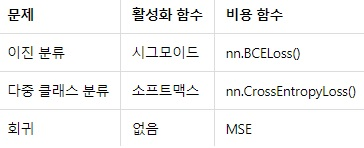

주의할 점은 
nn.CrossEntropyLoss()는 소프트맥스 함수를 이미 포함하고 있다.

BCE는 BCE 사용 전에 sigmoid를 사용해줘야 한다.



## torch.nn vs torch.nn.functional (nn.Cross Entropy loss vs F.cross entropy ) 

둘다 사용가능하나

nn.Cross Entropy loss은 클래스로서 사용하고, F.cross entropy은 함수로서 사용가능

nn.Cross Entropy loss은 클래스로서 사용하므로, state라는 가중치를 추가해주기 편함

https://cvml.tistory.com/10

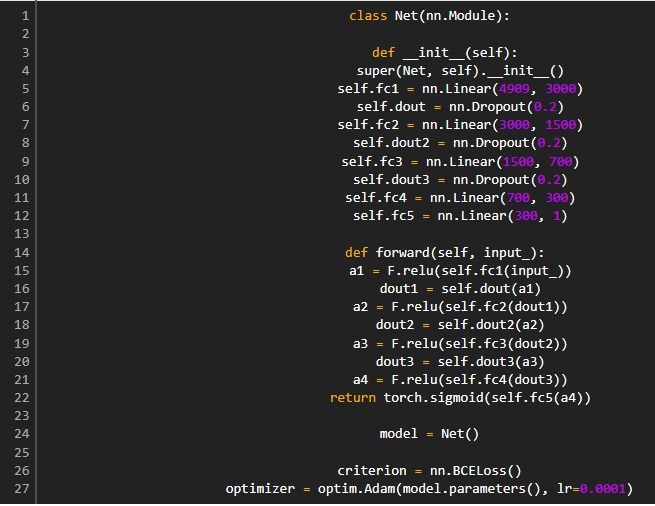

# 1) 평균 제곱 오차(MSE)
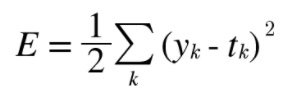

In [11]:
import numpy as np
def mean_squared_error(pred, y):
    e = 0.5 * np.sum((np.array(pred) - np.array(y))** 2)
    return e

pred = [.1, .05, .6, 0., .05, .1, 0., .1, 0., 0.] # 신경망이 예측한 값
y = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] # 실제 정답 lable

mean_squared_error(pred, y)

0.09750000000000003

# 2) 교차 엔트로피 오차(Cross Entropy Error)
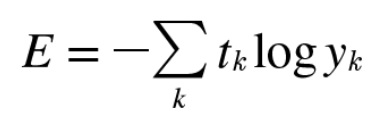

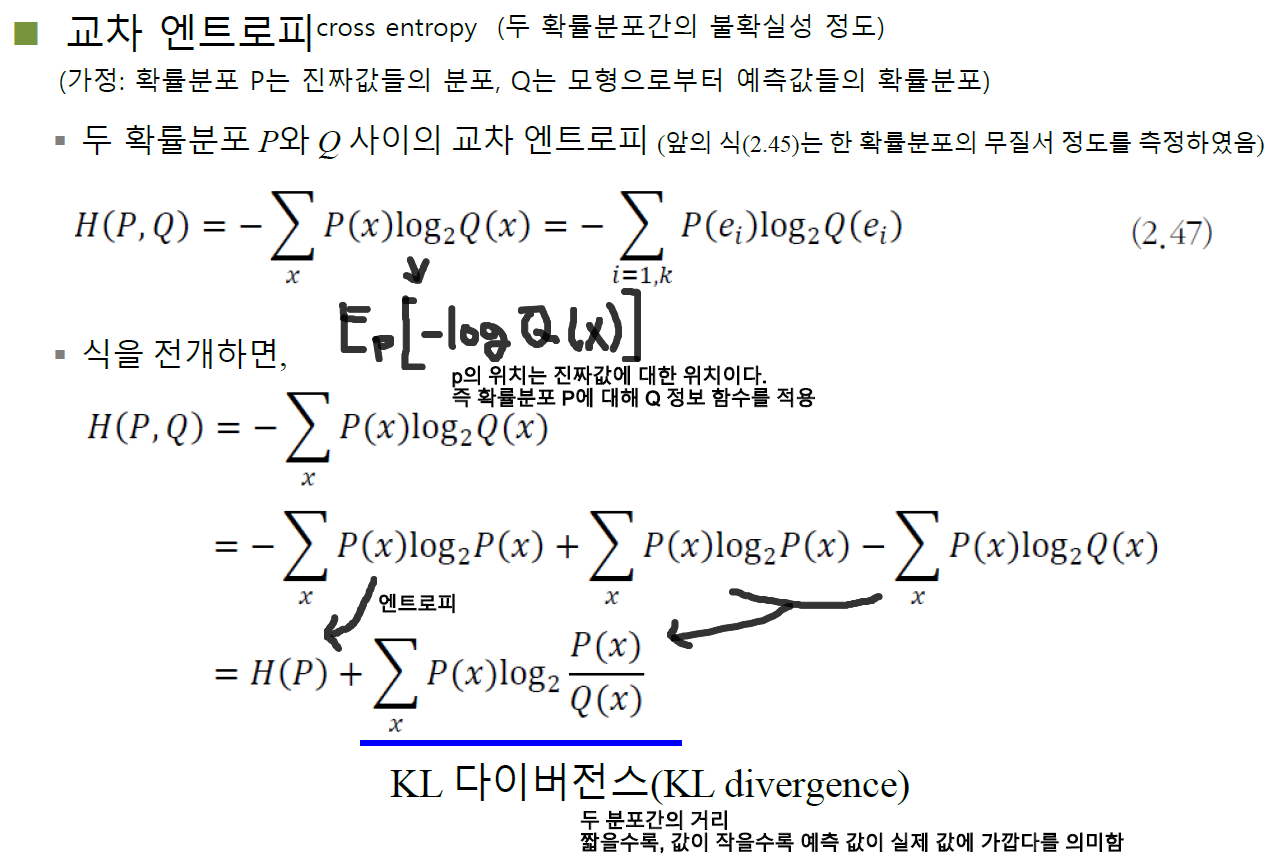

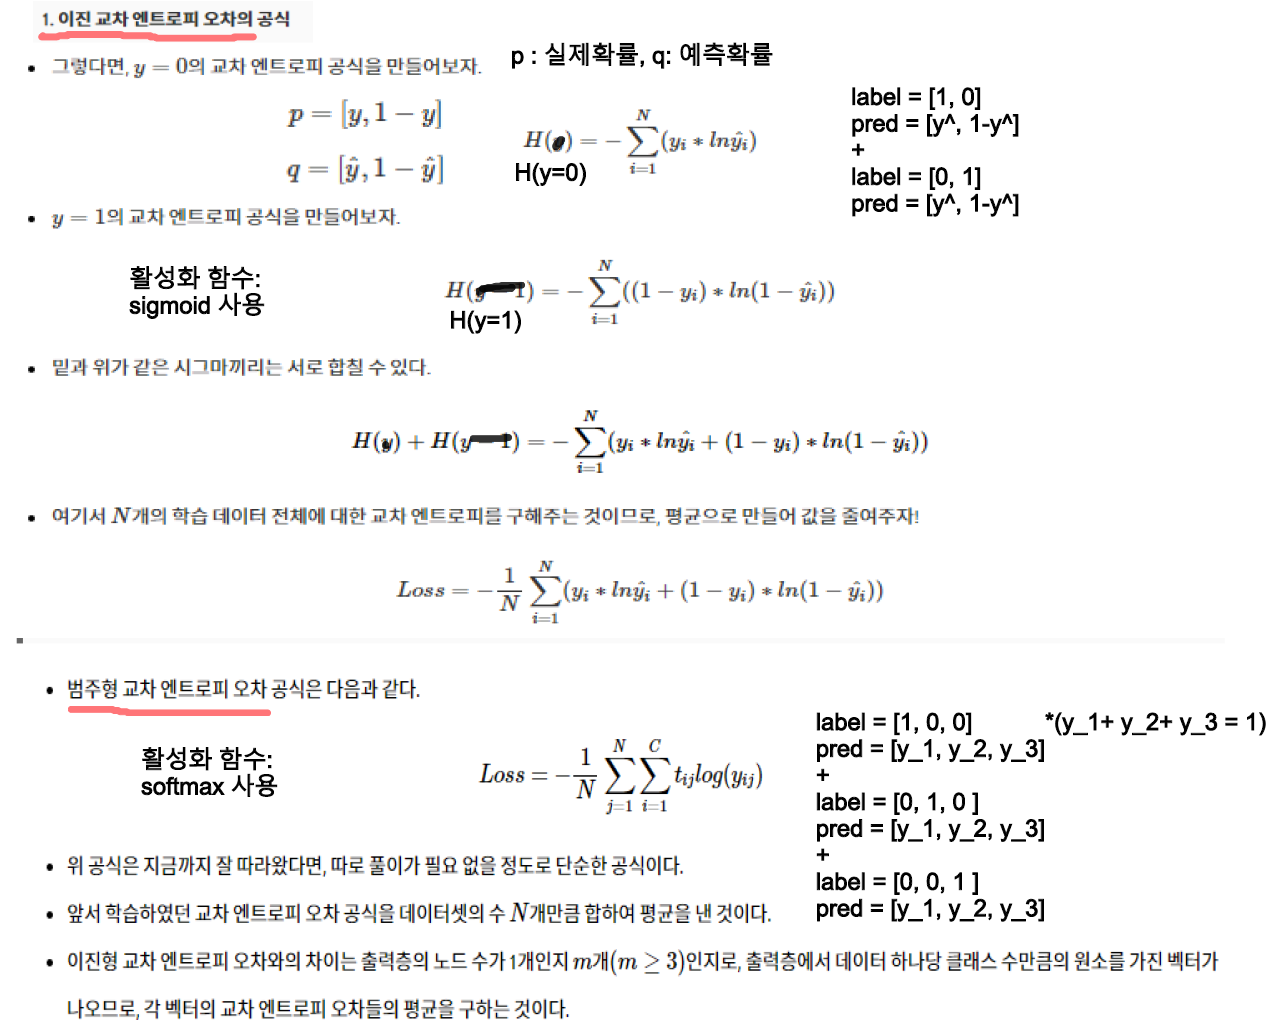

In [20]:
## 일반적인 크로스 엔트로피

def cross_entropy_error(pred, y):
    return -np.sum(y * np.log1p(pred)) / len(pred)  ## log1p(x) 사용, x=0일때의 문제를 방지

In [21]:
pred = np.array([.1, .05, .6 , 0., .05, .1, 0., .1, .0, 0.])
y = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

cross_entropy_error(pred, y)

-0.04700036292457356

In [26]:
## 2차원 크로스 엔트로피

def cross_entropy_error_2dim(pred, y):
    error1 = -np.sum(y[:,0] * np.log1p(pred[:,0])) / len(pred[:,0])  ## log1p(x) 사용, x=0일때의 문제를 방지
    error2 = -np.sum(y[:,1] * np.log1p(pred[:,1])) / len(pred[:,1])
    return (error1+error2)/2

In [27]:
pred = np.array([[.1, .05], [.6 , 0.], [.05, .1],[0., .1], [.0, 0.]])
y = np.array([[0, 0], [1, 0], [0, 0], [0, 0], [0, 0]])

cross_entropy_error_2dim(pred, y)



-0.04700036292457356

# 미니배치 학습에서의 교차 엔트로피

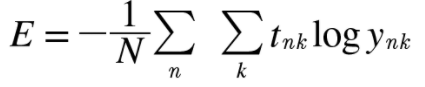

### ** N은 데이터의 수를 의미한다. N개의 데이터에 대해 교차 엔트로피 오차를 구한 후 이들에 대한 평균을 구해 정규화한 것이다

### MINI 배치 : 10000개의 데이터가 있다고할때, 200개씩 모델학습(backpropagation포함)을 끊어서 수행한다고 할때, 배치사이즈가 200인 미니배치 학습이라 한다. 이때. 오차는 200개씩 끊어서 학습한 마지막 가중치를 적용하여 계산한다. 

In [40]:
### 미니배치 구현
# x_train = np.random.randn(500,3)
# y_train = np.random.randn(500,1)

x_train = np.arange(1500).reshape(500,3)
y_train = np.arange(500)

train_size = x_train.shape[0]  ## 500개
batch_size = 10

## 0~500까지의 숫자에 대해, 10번 비복원 추출 실행 (np.random.choice(x))
batch_mask = np.random.choice(train_size, batch_size, replace = False) # replace = False : 비복원 추출
print(batch_mask, '\n')

x_train_batch = x_train[batch_mask]
y_train_batch = y_train[batch_mask]
print(x_train_batch, y_train_batch, sep='\n')


[335  38 334 350 158 301 363 355  20 473] 

[[1005 1006 1007]
 [ 114  115  116]
 [1002 1003 1004]
 [1050 1051 1052]
 [ 474  475  476]
 [ 903  904  905]
 [1089 1090 1091]
 [1065 1066 1067]
 [  60   61   62]
 [1419 1420 1421]]
[335  38 334 350 158 301 363 355  20 473]


# *np.random.choice()
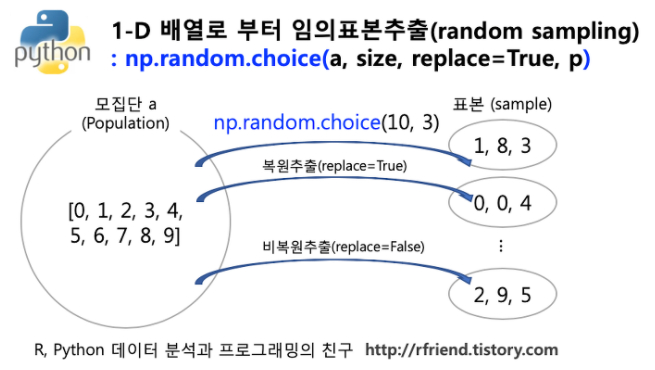


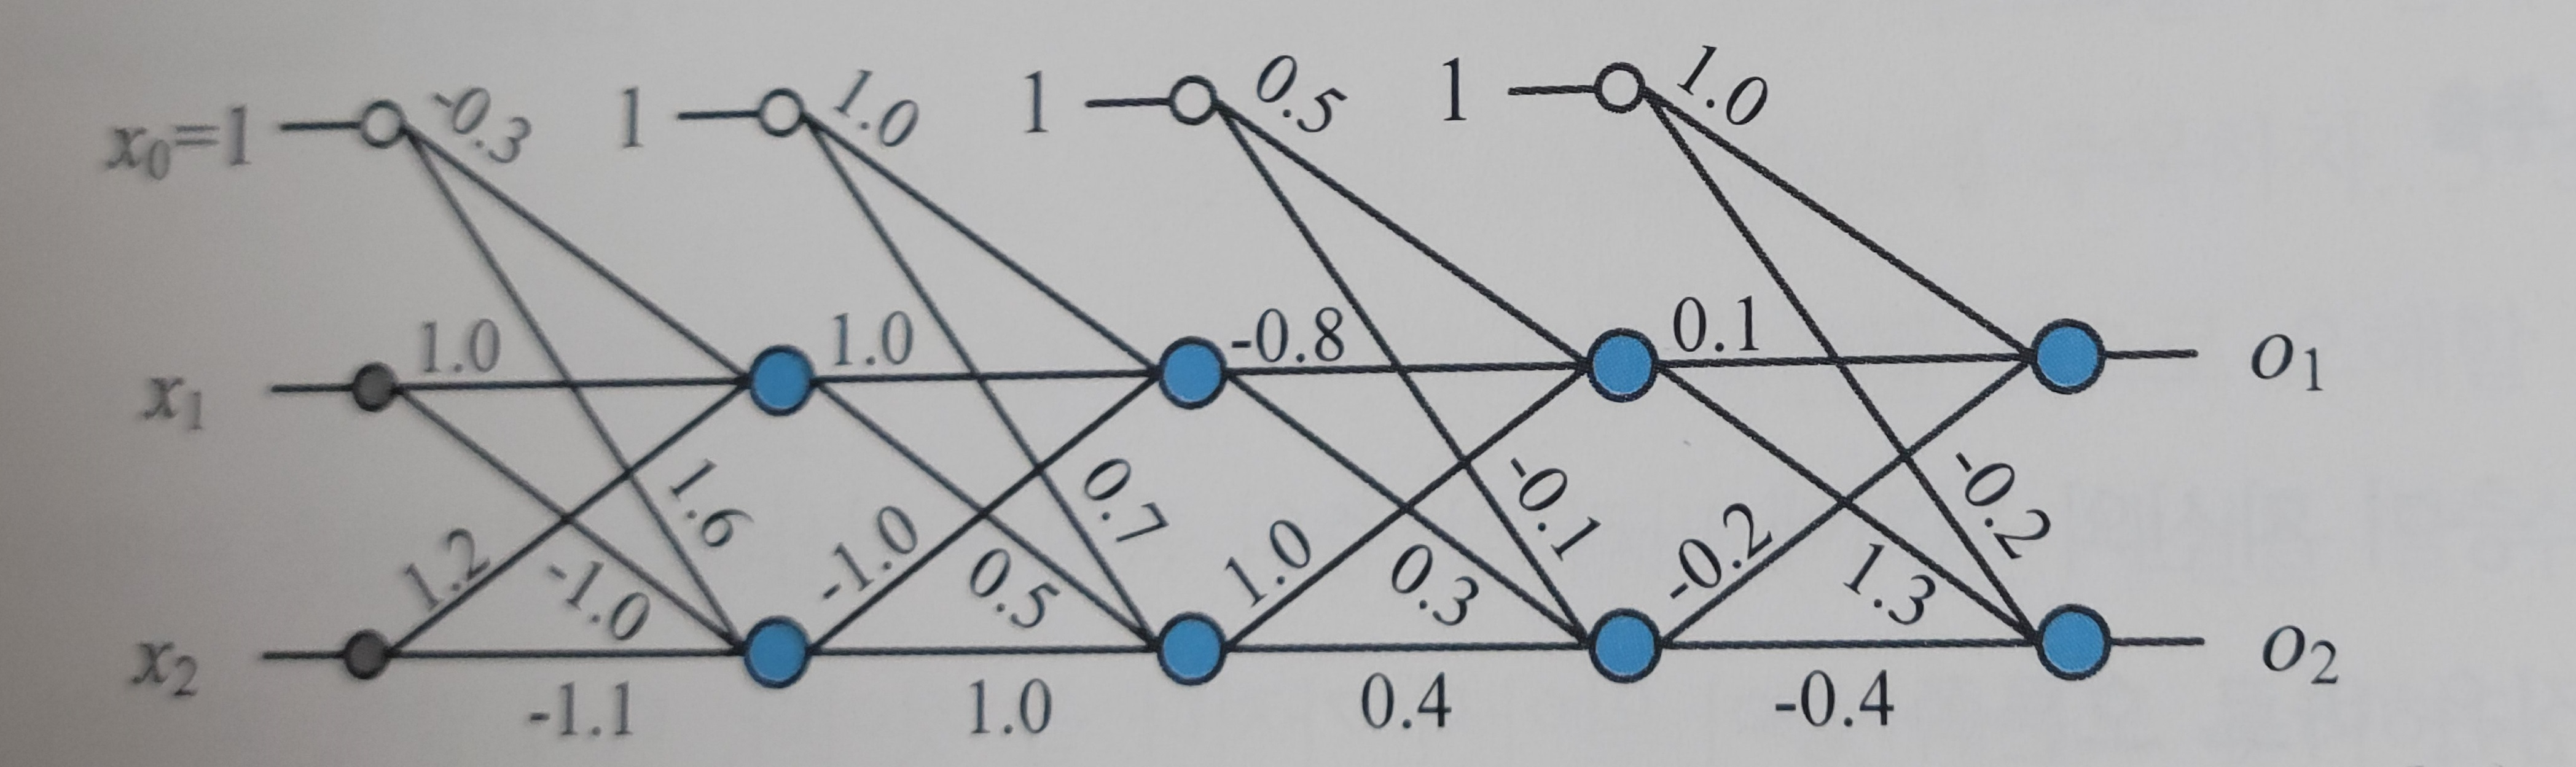

In [12]:
import numpy as np

def NN(x):

    w1 = np.array([[1,1.2],[-1,-1.1]]) 
    z1 = w1@x + [-0.3, 1.6]
    print(z1)
    
    w2 = np.array([[1,-1], [0.5,1]]) 
    z2 = w2@z1 + [1, 0.7] 
    print(z2)
    
    w3 = np.array([[-0.8,1], [0.3,0.4]]) 
    z3 = w3@z2 + [0.5, -0.1]
    print(z3)
    
    w4 = np.array([[0.1,-0.2], [1.3,-0.4]]) 
    z4 = w4@z3 + [1.0, -0.2]
    print(z4)
    
    
    
    
    
x = [1,0]    
NN(x)
    
    

[0.7 0.6]
[1.1  1.65]
[1.27 0.89]
[0.949 1.095]


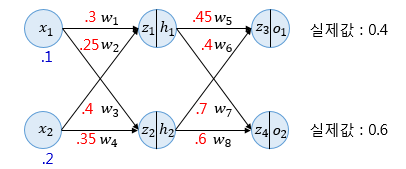

# https://wikidocs.net/37406

In [4]:
import numpy as np

def NN(x):

    w1 = np.array([[0.3, 0.25],[0.4, 0.35]]) 
    z1 = w1@x 
    print('z1:', z1)
    
    h1= sigmoid(z1)
    print('h1:',h1)
    
    w2 = np.array([[0.45, 0.4], [0.7, 0.6]]) 
    z2 = w2@h1 
    print('z2:',z2)
    
    output= sigmoid(z2)
    print('output:',output)
    
    
    
def sigmoid(x):
    return 1 / (1+np.exp(-x))
    
    
x = [0.1, 0.2]    
NN(x)

z1: [0.08 0.11]
h1: [0.51998934 0.5274723 ]
z2: [0.44498412 0.68047592]
output: [0.609446   0.66384491]


# 미니배치를 통해 실제 Loss 함수까지 구현

In [69]:
## feedfoward 전용 NN 생성

import numpy as np

def NN(x):

    w1 = np.array([[0.3, 0.25],[0.4, 0.35]]) 
    z1 = w1@x 
    print('z1:', z1)
    
    h1= sigmoid(z1)
    print('h1:',h1)
    
    w2 = np.array([[0.45, 0.4], [0.7, 0.6]]) 
    z2 = w2@h1 
    print('z2:',z2)
    
    output= sigmoid(z2)
    print('output:',output)
    
    return output
    
    
def sigmoid(x):
    return 1 / (1+np.exp(-x))
    
    
x = [0.1, 0.2] 

NN(x)

z1: [0.08 0.11]
h1: [0.51998934 0.5274723 ]
z2: [0.44498412 0.68047592]
output: [0.609446   0.66384491]


array([0.609446  , 0.66384491])

In [70]:
## 입력 및 타겟 데이터  생성
x_train = np.random.randn(55,2)
y_train = np.array([0,1]*55).reshape(55,2)

In [75]:
## 미니배치로 NN 적용후 Loss함수(크로스 엔트로피) 적용까지 

train_size = x_train.shape[0]
batch_size = 10

batch_random = np.random.choice(train_size, train_size, replace=False)  ## batch_random : 랜덤하게 index 순서를 섞은 리스트 
print('batch_random:', batch_random)

remain = len(batch_random) % batch_size         ## 배치대로 나누고 남은 데이터 처리용 (나머지)
n =  int((len((batch_random))) / batch_size)    ## 반복횟수 (iteration), 나머지가 존재할경우 iteration = n + 1
sum_error = 0


for i in range(n) :
#     print(batch_random[i*batch_size:(i+1)*batch_size])
    batch_pred = []
    batch_y = []
    
    for index in batch_random[i*batch_size:(i+1)*batch_size]:  ## 배치별로 10개씩 NN 적용및 Loss 함수 실행 
#         print(NN(list(x_train[index])),'\n')
        batch_pred.append(list(NN(x_train[index])))     ## Loss 함수 적용키위한 pred list 생성
        batch_y.append(list(y_train[index]))            ## Loss 함수 적용키위한 y list 생성
        
    else:                                    ## 작은 for문이 끝나면, pred list와 y list에 대해 loss 함수(크로스 엔트로피) 적용
        print('\n', batch_pred,'\n', batch_y,'\n')      
        sum_error += cross_entropy_error_2dim(np.array(batch_pred), np.array(batch_y))
        error_avg = sum_error/(i+1)         ## error_avg : batch별 크로스 엔프로피를 sumation한 값을  iteration 횟수로 나눔   
        print('##################')    
        print(i,'번째 sum_error:', error_avg )
else:
    batch_pred = []
    batch_y = []
    
    if remain == 0:    ## 배치대로 나누고 남은 데이터 처리용 (나머지)이 없으면 그대로 error_avg를 사용
        print('##################')
        print('최종 sum_error:', error_avg)
        
    else:   ## 배치대로 나누고 남은 데이터 처리용 (나머지)이 있으면 나머지에 대해 한번 더 Loss 함수 실행

        for index in batch_random[n*batch_size:n*batch_size+remain]:
            batch_pred.append(list(NN(x_train[index])))
            batch_y.append(list(y_train[index]))

        else:
            print('\n', batch_pred,'\n', batch_y,'\n')
            
            print('##################')
            print('최종 sum_error:',(error_avg*(n)*batch_size + 
                                   cross_entropy_error_2dim(np.array(batch_pred), np.array(batch_y))) / train_size )
    

    
    




# x_train_batch = x_train[batch_random]
# y_train_batch = y_train[batch_random]
# x_train_batch.shape, y_train_batch.shape

batch_random: [38 17  3 48 23 26 35 22 19  2 32 15 52 46 25 24 36  9 31 34 21  5 39 41
 12 53 54 29 28 10 44 49  6 27 18 11  7 47 30 13  4 51 50 40 20 33  0 16
 43 14  8 45 42  1 37]
z1: [-0.7857572  -1.05170306]
h1: [0.31308041 0.2588982 ]
z2: [0.24444546 0.37449521]
output: [0.56080887 0.59254473]
z1: [0.13662115 0.19704415]
h1: [0.53410226 0.54910227]
z2: [0.45998692 0.70333294]
output: [0.61301107 0.66892631]
z1: [0.53258051 0.71557003]
h1: [0.63008477 0.67163076]
z2: [0.55219045 0.8440378 ]
output: [0.63464364 0.69931494]
z1: [-0.2753535  -0.37909115]
h1: [0.43159329 0.40634612]
z2: [0.35675543 0.54592298]
output: [0.58825479 0.63318917]
z1: [0.13139589 0.17086029]
h1: [0.53280179 0.54261146]
z2: [0.45680539 0.69852813]
output: [0.61225605 0.66786136]
z1: [-0.35594691 -0.47388537]
h1: [0.41194106 0.38369704]
z2: [0.33885229 0.51857696]
output: [0.5839117  0.62681495]
z1: [-0.15238891 -0.19808396]
h1: [0.46197633 0.4506403 ]
z2: [0.38814547 0.59376761]
output: [0.59583618 0.6442291